# Exploratory Data Analysis (EDA)

In this notebook, we will perform exploratory data analysis on the Tunisian stock market data to gain insights and identify patterns.


In [8]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from dash import Dash, html, dcc, Input, Output

In [9]:
# Reading the data
data = pd.read_csv('./data/cleaned_weekly_stock_market.csv')

# Display the first few rows of the dataset
data.head()

,companyName,date,openingPrice,highestPrice,lowestPrice,closingPrice,volume
0,SOTUMAG,2014-06-16,1.76,1.80,1.73,1.73,44315.0
1,SOTUMAG,2014-06-23,1.78,1.82,1.77,1.82,9551.0
2,SOTUMAG,2014-06-30,1.81,1.82,1.81,1.81,2401.0
3,SOTUMAG,2014-07-07,1.78,1.82,1.78,1.80,10341.0
4,SOTUMAG,2014-07-14,1.83,1.83,1.76,1.81,27480.0


## Summary Statistics

We will start by generating summary statistics for the dataset to understand its basic properties.


In [10]:
# Summary statistics
summary_stats = data.describe()
summary_stats


,openingPrice,highestPrice,lowestPrice,closingPrice,volume
count,38631.000000,38631.000000,38631.000000,38631.000000,3.863100e+04
mean,106.641003,107.559123,105.715594,106.777993,2.821250e+05
std,791.642044,797.612176,785.735260,792.626816,2.504922e+06
min,0.110000,0.110000,0.110000,0.110000,0.000000e+00
25%,2.930000,2.990000,2.850000,2.930000,1.610000e+03
50%,6.690000,6.800000,6.530000,6.700000,1.003900e+04
75%,14.705000,14.910000,14.470000,14.710000,3.901750e+04
max,9592.970000,9670.220000,9578.670000,9663.860000,1.124223e+08


In [11]:
data.shape

(38631, 7)

## Companies Stock Prices

we will visualize the stock prices of the companies in the dataset to identify patterns and trends.

In [12]:
data["companyName"].unique()

array(['SOTUMAG', 'TUNISAIR', 'STEQ', 'BANQUE ATTIJARI DE TUNIS',
       'HANNIBAL LEASE', 'AMI', 'CELLCOM', 'SIPHAT', 'TUNISIE VALEURS',
       'POULINA GROUP HOLDING', 'PLACEMENTS DE TUNISIE - SICAF', 'SIAME',
       'ONE TECH', 'TUNISIE LEASING & FACTORING', 'SOPAT',
       'ASSURANCES MAGHREBIA', 'WIFAK INT BANK', 'MAGASIN GENERAL',
       'SERVICOM', 'MIP', 'SOTUVER', 'UNIMED', 'SOTIPAPIER',
       'MEUBLES INTERIEURS', 'ESSOUKNA', 'STB BANK', 'UIB',
       'MAGHREBIA VIE', 'AMEN BANK', 'BH ASSURANCE',
       'SOCIETE CHIMIQUE ALKIMIA', 'BH BANK', 'CEREALIS', 'SOTRAPIL',
       'ATTIJARI LEASING', 'CITY CARS', 'MONOPRIX', 'CARTHAGE CEMENT',
       'ICF', 'BANQUE NATIONALE AGRICOLE', 'TPR', 'ELBENE', 'SOTEMAIL',
       'BH LEASING', 'ARAB TUNISIAN BANK', 'DELICE HOLDING', 'SOTETEL',
       'ARTES', 'SANIMED', 'TUNISIAN BOND INDEX', 'UADH', 'TAWASOL',
       'SMART TUNISIE', 'ASSAD', 'SYPHAX AIRLINES', 'TELNET HOLDING',
       'TUNINVEST - SICAR', 'SFBT', 'GIF FILTER', 'UBCI', "LAND

In [13]:
data['date'] = pd.to_datetime(data['date'])

data_on_specific_date = data[data['date'] == '2024-06-10']

companies_with_data_on_specific_date = data_on_specific_date['companyName'].unique()

filtered_data = data[data['companyName'].isin(companies_with_data_on_specific_date)]

print(filtered_data)
print(filtered_data['companyName'].unique())

      companyName       date  openingPrice  highestPrice  lowestPrice  \
0         SOTUMAG 2014-06-16          1.76          1.80         1.73   
1         SOTUMAG 2014-06-23          1.78          1.82         1.77   
2         SOTUMAG 2014-06-30          1.81          1.82         1.81   
3         SOTUMAG 2014-07-07          1.78          1.82         1.78   
4         SOTUMAG 2014-07-14          1.83          1.83         1.76   
...           ...        ...           ...           ...          ...   
38626     SOMOCER 2024-05-13          0.52          0.52         0.46   
38627     SOMOCER 2024-05-20          0.50          0.56         0.48   
38628     SOMOCER 2024-05-27          0.56          0.57         0.50   
38629     SOMOCER 2024-06-03          0.53          0.55         0.49   
38630     SOMOCER 2024-06-10          0.50          0.51         0.49   

       closingPrice    volume  
0              1.73   44315.0  
1              1.82    9551.0  
2              1.81    2401

## Companies Stock Prices

In [14]:
# Ensure all required columns are present
required_columns = ['date', 'companyName', 'openingPrice', 'highestPrice', 'lowestPrice', 'closingPrice', 'volume']
if not all(column in data.columns for column in required_columns):
    missing = [column for column in required_columns if column not in data.columns]
    raise ValueError(f"The DataFrame is missing the required columns: {missing}")

data['date'] = pd.to_datetime(data['date'])

# Create a list of unique company names
companies = filtered_data['companyName'].unique()

# Initialize Dash app
app = Dash(__name__)

app.layout = html.Div([
    dcc.Dropdown(
        id='company-dropdown',
        options=[{'label': company, 'value': company} for company in companies],
        value=companies[0],  # default value
        style={'width': '50%'}
    ),
    dcc.Graph(id='stock-graph')
])

@app.callback(
    Output('stock-graph', 'figure'),
    Input('company-dropdown', 'value')
)
def update_graph(selected_company):
    # Filter data for the selected company
    company_data = filtered_data[filtered_data['companyName'] == selected_company]
    
    fig = go.Figure()
    
    # Add traces for price data
    fig.add_trace(go.Scatter(
        x=company_data['date'],
        y=company_data['openingPrice'],
        mode='lines',
        name='Opening Price',
        hovertemplate='%{x|%Y-%m-%d} - %{y:.2f}<extra></extra>',
    ))

    fig.add_trace(go.Scatter(
        x=company_data['date'],
        y=company_data['highestPrice'],
        mode='lines',
        name='Highest Price',
        hovertemplate='%{x|%Y-%m-%d} - %{y:.2f}<extra></extra>',
    ))

    fig.add_trace(go.Scatter(
        x=company_data['date'],
        y=company_data['lowestPrice'],
        mode='lines',
        name='Lowest Price',
        hovertemplate='%{x|%Y-%m-%d} - %{y:.2f}<extra></extra>',
    ))

    fig.add_trace(go.Scatter(
        x=company_data['date'],
        y=company_data['closingPrice'],
        mode='lines',
        name='Closing Price',
        hovertemplate='%{x|%Y-%m-%d} - %{y:.2f}<extra></extra>',
    ))

    # Add a bar chart for volume
    fig.add_trace(go.Bar(
        x=company_data['date'],
        y=company_data['volume'],
        name='Volume',
        marker_color='rgba(100, 200, 102, 0.5)',
        hovertemplate='%{x|%Y-%m-%d} - %{y}<extra></extra>',
    ))

    fig.update_layout(
        height=600,
        title=f'Stock Market Data of {selected_company}',
        xaxis_title='Date',
        yaxis_title='Price',
        hovermode='x unified',
        template='plotly_white',
        showlegend=True,
        legend=dict(
        font=dict(
            size=10,  
        ),
        orientation="h",
    ),
    )

    # Create a second y-axis for the volume
    fig.update_layout(
        yaxis=dict(
            title='Price',
            tickformat=".2f",
        ),
        yaxis2=dict(
            title='Volume',
            overlaying='y',
            side='right',
            showgrid=False,
        )
    )

    # Assign the volume trace to the second y-axis
    fig.data[-1].update(yaxis='y2')

    return fig

if __name__ == '__main__':
    app.run_server(debug=True)

## Correlation Heatmap of Closing Prices Between Companies

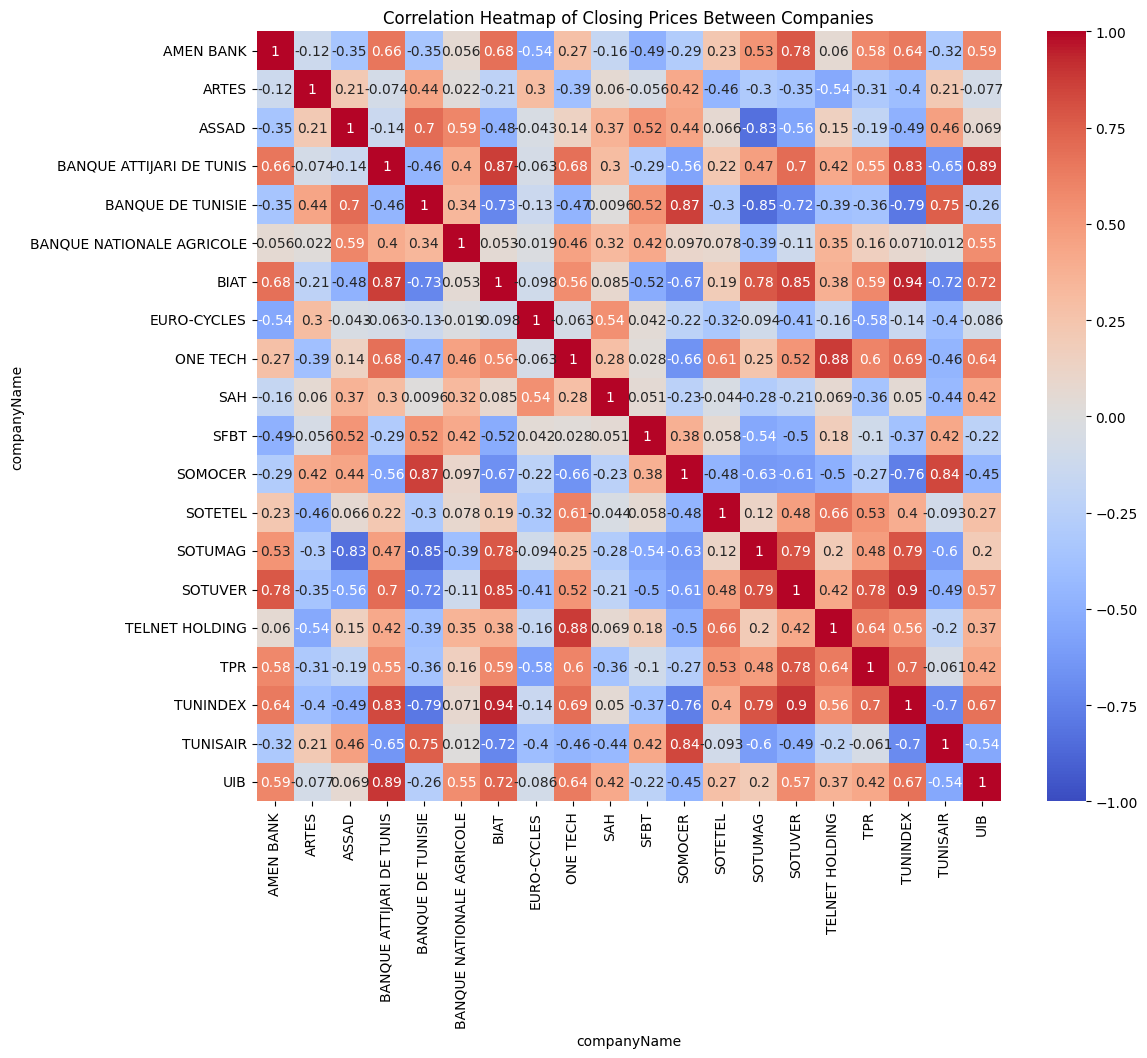

In [11]:
# Define the required columns
required_columns = ['date', 'companyName', 'closingPrice']
filtered_data = filtered_data[required_columns]

# Pivot the data to organize by date and company names
pivot_data = filtered_data.pivot(index='date', columns='companyName', values='closingPrice')

# Calculate the correlation matrix
correlation_matrix = pivot_data.corr()

# Generate the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Closing Prices Between Companies')
plt.show()